In [12]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import dateutil.parser
from matplotlib.dates import DateFormatter , AutoDateLocator


In [13]:
# Load the dataset

df = pd.read_csv('../Data_Files/weatherreadings1.csv')


In [14]:
df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

In [16]:
#Convert the reportStartDateTime and reportEndDateTime columns to datetime format
df[['reportStartDateTime', 'reportEndDateTime']]= df[['reportStartDateTime', 'reportEndDateTime']].apply(pd.to_datetime)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     datetime64[ns, UTC]
 2   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

In [17]:
# Manipulating date and time objects in Python from a datetime column in pandas

# Extract the year, month, day, hour, minute, and second from the reportStartDateTime column
df['year'] = df['reportStartDateTime'].dt.year
df['month'] = df['reportStartDateTime'].dt.month
df['day'] = df['reportStartDateTime'].dt.day
df['hour'] = df['reportStartDateTime'].dt.hour
df['minute'] = df['reportStartDateTime'].dt.minute
df['second'] = df['reportStartDateTime'].dt.second

df.head()


,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,externalSiteId,createdDateTime,version,externalId,year,month,day,hour,minute,second
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:15:00+00:00,2024-10-02 16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561,2024,10,2,16,15,0
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:45:00+00:00,2024-10-02 16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550,2024,10,2,16,45,0
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:00:00+00:00,2024-10-02 17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947,2024,10,2,17,0,0
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:15:00+00:00,2024-10-02 17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149,2024,10,2,17,15,0
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:30:00+00:00,2024-10-02 17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922,2024,10,2,17,30,0


In [18]:
# Extract the day of the week from the reportStartDateTime column

df['day_of_week'] = df['reportStartDateTime'].dt.day_name()

df.head()


,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,createdDateTime,version,externalId,year,month,day,hour,minute,second,day_of_week
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:15:00+00:00,2024-10-02 16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,2024-10-02T16:15:28.5671119+00:00,1,12577570561,2024,10,2,16,15,0,Wednesday
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:45:00+00:00,2024-10-02 16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,2024-10-02T16:45:40.4251616+00:00,1,12577595550,2024,10,2,16,45,0,Wednesday
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:00:00+00:00,2024-10-02 17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,2024-10-02T17:01:12.3376405+00:00,1,12577608947,2024,10,2,17,0,0,Wednesday
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:15:00+00:00,2024-10-02 17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,2024-10-02T17:15:22.2638326+00:00,1,12577622149,2024,10,2,17,15,0,Wednesday
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:30:00+00:00,2024-10-02 17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,2024-10-02T17:30:29.3915476+00:00,1,12577636922,2024,10,2,17,30,0,Wednesday


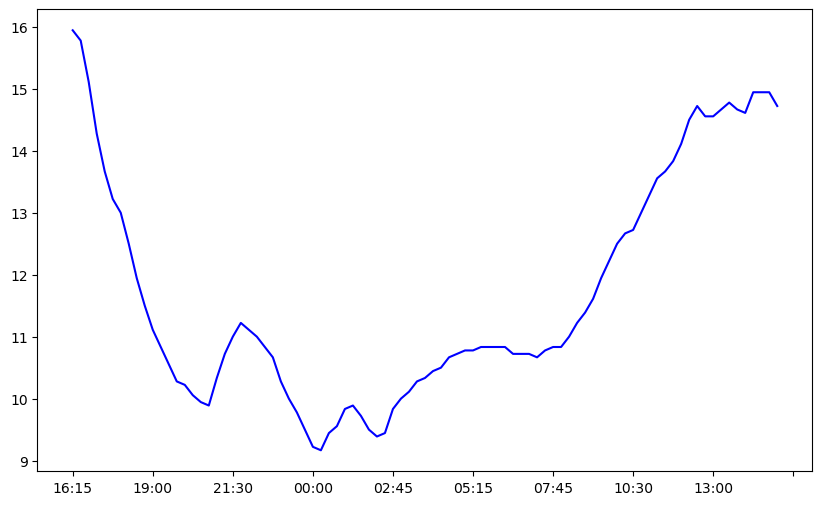

In [19]:
# plot the drybulb temperature against the reportStartDateTime column

fig, ax = plt.subplots(figsize=(10, 6))	

drybulbtemp = df['dryBulbTemperature_Celsius'].to_list()

reportStartDateTime = df['reportStartDateTime'].dt.strftime('%H:%M').to_list()

ax.plot(reportStartDateTime, drybulbtemp, color='blue')

ax.xaxis.set_major_locator(plt.MaxNLocator(11))


plt.show()



Alternatively,

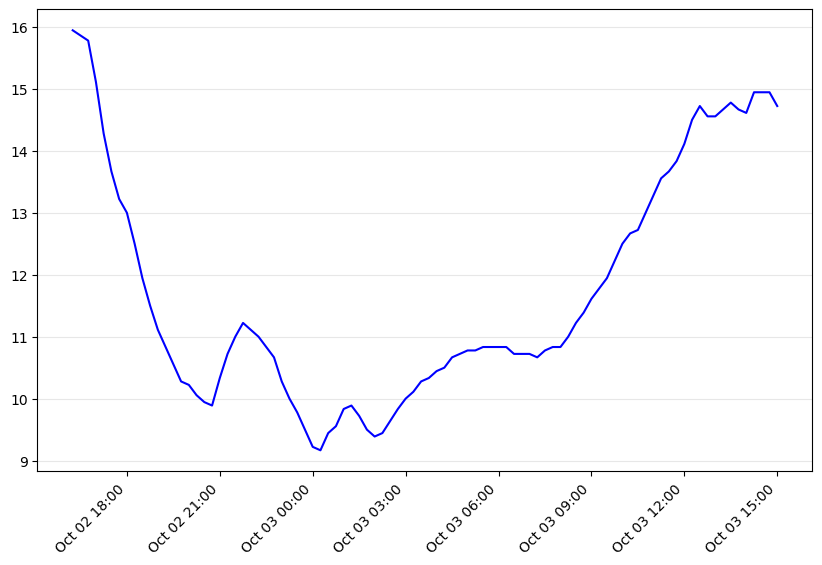

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))	    

reportStartDateTime = pd.to_datetime(df['reportStartDateTime'])

ax.plot(reportStartDateTime, drybulbtemp, color='blue')

date_format = DateFormatter("%b %d %H:%M")                       
ax.xaxis.set_major_formatter(date_format)

locator = AutoDateLocator()                                       
ax.xaxis.set_major_locator(locator)

ax.grid(axis="y",alpha=0.30)

labels = ax.get_xticklabels()

plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()